**Train on whole dataset and test on test set**

In [177]:
import os
import pandas as pd 
import numpy as np

from expert_tree import get_expert_tree_results, Expert_Tree
from wrapper import best_first_search_mg

from sklearn.metrics import confusion_matrix

Test define feature subset

In [178]:
# feats1 = ['ArmSwelling', 'FHT', 'BreastSwelling', 'Skin', 'DISCOMFORT', 
#          'TIME_LAPSE_LOG', 'Mobility', 'PAS', 'BMI', 
#          'ChestWallSwelling', 'Chemotherapy', 'Mastectomy']

# feats2 = ['ArmSwelling', 'SYM_COUNT', 'FHT', 'BreastSwelling', 'Skin', 'DISCOMFORT', 
#          'TIME_LAPSE_LOG', 'Mobility', 'PAS']

# feats3 = ['ArmSwelling', 'FHT', 'BreastSwelling', 'Skin', 'DISCOMFORT', 
#          'TIME_LAPSE_LOG', 'PAS', 'BMI', 
#          'SLNB_Removed_LN', 'Radiation', 'Lumpectomy', 'Chemotherapy']

# feats4 = ['ArmSwelling', 'BreastSwelling', 'Skin', 'PAS', 'DISCOMFORT', 'Age', 
#          'SLNB_Removed_LN', 'BMI', 'TIME_LAPSE_LOG']

# feat5 = ['ArmSwelling', 'SYM_COUNT', 'BreastSwelling', 'TIME_LAPSE_LOG', 'Age', 'Skin',
#  'ALND_Removed_LN', 'SLNB_Removed_LN']

# feat6 = ['ArmSwelling', 'SYM_COUNT', 'BreastSwelling', 'TIME_LAPSE_LOG', 'FHT', 'Age', 'Skin',
#         'DISCOMFORT', 'Lumpectomy']

# feat7 = ['ArmSwelling', 'BreastSwelling', 'Skin', 'PAS', 'FHT', 'DISCOMFORT',
#          'SYM_COUNT', 'Chemotherapy', 'Age', 'TIME_LAPSE_LOG']

# feat8 = ['ArmSwelling', 'BreastSwelling', 'Skin', 'PAS', 'FHT', 'DISCOMFORT',
#  'SYM_COUNT', 'ALND_Removed_LN', 'Lumpectomy', 'TIME_LAPSE_LOG']

# feat9 = ['Mobility', 'ArmSwelling', 'BreastSwelling', 'Skin', 'FHT', 'SYM_COUNT',
#  'ChestWallSwelling', 'Radiation', 'Age', 'TIME_LAPSE_LOG']

feat_gbt = ['Mobility', 'ArmSwelling', 'BreastSwelling', 'Skin', 'FHT', 'SYM_COUNT', 'Age', 'TIME_LAPSE_LOG']

feat_gbt_backward = ['Mobility', 'ArmSwelling', 'BreastSwelling', 'Skin', 'SYM_COUNT',
                     'Chemotherapy', 'Radiation', 'Age', 'Lumpectomy', 'TIME_LAPSE_LOG']

# cart_feat1 = ['ArmSwelling', 'BreastSwelling', 'Skin', 'SYM_COUNT', 'Chemotherapy', 'Hormonal']

# cart_feat2 = ['SYM_COUNT', 'ArmSwelling', 'BreastSwelling', 'TIME_LAPSE_LOG', 'Skin', 'Age']

# cart_feat3 = ['Mobility', 'ArmSwelling', 'BreastSwelling', 'DISCOMFORT', 'SYM_COUNT','Radiation', 'SLNB_Removed_LN', 'Lumpectomy', 'Hormonal', 'TIME_LAPSE_LOG']

# cart_feat4 = ['ArmSwelling', 'BreastSwelling', 'DISCOMFORT', 'SYM_COUNT', 'Radiation'
#               ,'SLNB_Removed_LN', 'Mastectomy', 'Lumpectomy', 'Hormonal', 'TIME_LAPSE_LOG']

feat_cart = ['SYM_COUNT', 'ArmSwelling', 'BreastSwelling', 'TIME_LAPSE_LOG', 'DISCOMFORT']

feat_cart_backward = ['Mobility', 'ArmSwelling', 'BreastSwelling', 'DISCOMFORT', 'SYM_COUNT',
                      'Radiation', 'SLNB_Removed_LN', 'Mastectomy', 'Hormonal', 'TIME_LAPSE_LOG']

In [179]:
feat_gbt_forward_binary = ['ArmSwelling','BreastSwelling', 'PAS', 'SYM_COUNT', 'Age', 'BMI', 'TIME_LAPSE_LOG']
feat_gbt_backward_binary = ['Mobility', 'ArmSwelling', 'BreastSwelling', 'Skin', 'PAS', 'DISCOMFORT',
 'SYM_COUNT', 'ChestWallSwelling', 'Chemotherapy', 'Radiation', 'Age',
 'SLNB_Removed_LN', 'Mastectomy', 'Lumpectomy', 'Hormonal', 'BMI',
 'TIME_LAPSE_LOG']

In [180]:
num_class = 3
if num_class == 2:
    w = [0.45258215, 1-0.45258215]
else:
    w = [0.15913545, 0.54254953, 0.29831502]
print(w)

feats = feat_gbt
if_all_feature = False
if if_all_feature:
    feats = data_train.columns.values[:-1]

[0.15913545, 0.54254953, 0.29831502]


In [181]:
estimator_types = ['gbt', 'cart']
estimator_type = estimator_types[1]
print('estimator_type:', estimator_type)

estimator_type: cart


In [182]:
data_train = pd.read_csv('./data/result_data/split_train_Oct21_stratified.csv')
data_test = pd.read_csv('./data/result_data/split_test_Oct21_stratified.csv')
overlap = set(data_train['Username'].values) & set(data_test['Username'].values)
print(overlap)
assert len(overlap) == 0, "there is overlap between training and testing!!!"
data_train = data_train.drop(columns=['Unnamed: 0', 'Username'])
data_test = data_test.drop(columns=['Unnamed: 0', 'Username'])

set()


In [183]:

X_train, Y_train = data_train[feats], data_train.iloc[:,-1]
X_test, Y_test = data_test[feats], data_test.iloc[:,-1]

print('column:', X_train.columns.values)
X_train, Y_train = X_train.values, Y_train.values
X_test, Y_test = X_test.values, Y_test.values

if num_class==2:
    Y_train[Y_train==2] = 1
    Y_test[Y_test==2] = 1

column: ['Mobility' 'ArmSwelling' 'BreastSwelling' 'Skin' 'FHT' 'SYM_COUNT' 'Age'
 'TIME_LAPSE_LOG']


In [184]:
np.unique(Y_train, return_counts=True)

(array([0, 1, 2]), array([485, 142, 259]))

In [185]:
# gradient boosting tree
if estimator_type == 'gbt':
    from sklearn.ensemble import GradientBoostingClassifier
    params = {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 70}
    estimator = GradientBoostingClassifier(**params)
else:
    from sklearn.tree import DecisionTreeClassifier
    params = {'max_leaf_nodes': 13, 'criterion':'gini'}
    estimator = DecisionTreeClassifier(**params)
print(estimator)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=13,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [186]:
np.unique(Y_test, return_counts=True)

(array([0, 1, 2]), array([98, 28, 52]))

<b>Cross-Validation </b>

In [187]:
random_state = 320
shuffle= True

from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, cross_validate

def cross_validate_custom(X, y, num_repeated, estimator):
    n_splits = 8
    if num_repeated > 1:
        print("num_repeated is not 1")
        skf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=num_repeated, random_state=random_state)
    else:
        skf = StratifiedKFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
        #     scores = cross_validate(estimator, X, y, scoring='accuracy', n_jobs=-1, cv=skf, verbose=0, 
        #                             return_estimator=True, return_train_score=True)
    test_scores = []
    CM = np.zeros((num_class,num_class))
    sensitivities = []
    sepcificities = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        estimator.fit(X_train, y_train, sample_weight=[w[i] for i in y_train])
        score = estimator.score(X_test, y_test, sample_weight=[w[i] for i in y_test])
        test_scores.append(score)
        cm = confusion_matrix(y_test, estimator.predict(X_test))
        CM += cm
        if num_class == 2:
            tn, fp, fn, tp = cm.ravel() 
            TPR = tp/ (tp+fn)
            FPR = fp/(fp+tn)
            sensitivities.append(TPR)
            sepcificities.append(1 - FPR)
    # return np.mean(scores['test_score']), np.mean(scores['train_score'])
    # print(test_scores)
    return test_scores, sensitivities, sepcificities, CM 

In [188]:
test_scores, sensitivities, sepcificities, CM  = cross_validate_custom(X_train, Y_train, 5, estimator)
print('Cross-Validation')
print('accu')
print('mean:', np.mean(test_scores))
print('std:', np.std(test_scores))
print('sensitivity')
print('mean:', np.mean(sensitivities))
print('std:', np.std(sensitivities))
print('sepcificity')
print('mean:', np.mean(sepcificities))
print('std:', np.std(sepcificities))
print('CM:')
print(CM)

num_repeated is not 1
Cross-Validation
accu
mean: 0.9049816189340245
std: 0.030224374139100434
sensitivity
mean: nan
std: nan
sepcificity
mean: nan
std: nan
CM:
[[2319.   88.   18.]
 [  25.  638.   47.]
 [   6.  175. 1114.]]


/opt/conda/envs/python37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/envs/python37/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/envs/python37/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/conda/envs/python37/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/opt/conda/envs/python37/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [189]:
_, counts = np.unique(Y_test, return_counts=True)
counts

array([98, 28, 52])

In [190]:
counts * w

array([15.5952741 , 15.19138684, 15.51238104])

**Train and test using feature subset**

In [191]:
print(f'X train: {X_train.shape}')
print(f'Y train: {len(Y_train)}')
print(f'X test: {X_test.shape}')
print(f'Y test: {len(Y_test)}')

X train: (886, 8)
Y train: 886
X test: (178, 8)
Y test: 178


In [192]:
estimator= estimator.fit(X_train, Y_train, sample_weight=[w[i] for i in Y_train])
train_accu = estimator.score(X_train, Y_train, sample_weight=[w[i] for i in Y_train])
print('train_accu:')
print(train_accu)
feature_weight_pair = sorted(zip(feats, estimator.feature_importances_), key=lambda pair : pair[1], reverse=True)
print('learnt importance:')
for pair in feature_weight_pair:
    print(f"{pair[0]}")
    print(f"{pair[1]:.6f}")

train_accu:
0.9430116327019606
learnt importance:
SYM_COUNT
0.424503
ArmSwelling
0.360578
BreastSwelling
0.136124
TIME_LAPSE_LOG
0.062121
Skin
0.009002
Age
0.007672
Mobility
0.000000
FHT
0.000000


In [193]:
accu = estimator.score(X_test, Y_test)
print(f'accuracy: {accu}')
CM = confusion_matrix(Y_test, estimator.predict(X_test))
print('confusion matrix:')
print(CM)
print(f"num_class:{num_class}")
if num_class == 2:
    tn, fp, fn, tp = CM.ravel() 
    TPR = tp/ (tp+fn)
    FPR = fp/(fp+tn)
    print('sensitivity', TPR)
    print('sepcifivity', 1 - FPR)
    

accuracy: 0.9213483146067416
confusion matrix:
[[91  4  3]
 [ 2 26  0]
 [ 0  5 47]]
num_class:3


In [194]:
w

[0.15913545, 0.54254953, 0.29831502]

<b> Calculate T1 </b>

In [195]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import matplotlib.pyplot as plt

In [196]:
def t_eval_fold(t ,y_ts, yprob, get_t1=True):
    '''
    assumes y_ts has 3 class classification
    '''
    #get probabilities
    if get_t1:
        print('T1')
        ypred_current = ((yprob[:,1]+yprob[:,2])>t).astype(int)
    else:
        print('T2')
        ypred_current = ((yprob[:,2] / (yprob[:,1] + yprob[:,2])) > t).astype(int) + 1
        
        
    #print('y_ts_3class', y_ts)
    #print('y_ts_2class', y_ts)
    
    # print('ypred',ypred_current )
    print(confusion_matrix(y_ts, ypred_current))
    tn, fp, fn, tp = confusion_matrix(y_ts, ypred_current).ravel()
    TPR = tp/ (tp+fn)
    FPR = fp/(fp+tn)
    
    accu = (tp + tn) / (tn + fp + fn + tp)
   
    #returns senstivity and specifity
    return TPR , 1- FPR, accu, tn, fp, fn, tp

def thresholding_with_folds(Y_true, Y_prob, get_t1=True):
    T_range = 1.005
    t_values = list(np.arange(0.0,T_range,0.005))
    t_values = [round(elem,3) for elem in t_values]
    averages = []
    for t in t_values:
        sens_list =[]
        spec_list =[]
        accu_list = []
        kf = RepeatedStratifiedKFold(n_splits=8, n_repeats=5,random_state=1)
        # kf = KFold(n_splits=8 ,shuffle= False, random_state= True )
        for _, test_index in kf.split(Y_prob, Y_true): #for each fold
            # print("TRAIN:", train_index, "TEST:", test_index)
            sens, spec, accu, _, _, _, _ = t_eval_fold(t, Y_true[test_index], Y_prob[test_index], get_t1)
            sens_list.append(sens)
            spec_list.append(spec)
            accu_list.append(accu)
        sens_avg = np.mean(sens_list)
        sens_std= np.std(sens_list)
        spec_avg = np.mean(spec_list)
        spec_std =np.std(spec_list)
        accu_avg = np.mean(accu_list)
        accu_std = np.std(accu_list)
        averages.append([t, sens_avg , sens_std, spec_avg, spec_std, accu_avg, accu_std])
    return averages


def draw_roc_curve(result_matrix, title):
    fpr_list= []
    tpr_list= []
    for tup in result_matrix:
        t = tup[0]
        senstivity , specifity, accu = tup[1] , tup[3], tup[5]
        tpr_list.append(senstivity)
        fpr_list.append(1-specifity)
        print(t ,'\t' ,senstivity, '\t'  ,1-specifity, '\t', accu)
    plt.figure(figsize=(12,8))
    plt.plot(fpr_list, tpr_list)
    plt.title(title)
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show()
    
def test_t(t, test_2_class_labels, test_probs, title, get_t1=True):
    result = thresholding_with_folds(test_2_class_labels, test_probs, get_t1)
    draw_roc_curve(result, title)
    TPR , TNR, accu, tn, fp, fn, tp = t_eval_fold(t, test_2_class_labels, test_probs, get_t1)
    print('TPR: ', TPR)
    print('TNR: ', TNR)
    print('accu: ', accu)
    print('CM')
    print(np.array([[tn, fp],[fn, tp]]))

In [197]:
Y_train_prob = estimator.predict_proba(X_train)
Y_train_2_class = np.copy(Y_train)
Y_train_2_class[Y_train_2_class==2] = 1
print(Y_train_prob.shape)

(886, 3)


In [198]:
#A = list(zip(Y_train_prob[:,0], Y_train))
#A = [x for x in A if x[1] in [1,2]]
#print('max p1 for label 1 or 2 samples')
#np.max(np.array(A)[:,0],axis=0)

In [199]:
#t = 0.49
#ypred_current = ((Y_train_prob[:,1]+Y_train_prob[:,2])>t).astype(int)

In [200]:
#confusion_matrix(Y_train_2_class, ypred_current)

In [201]:
result = thresholding_with_folds(Y_train_2_class, Y_train_prob)

T1
[[57  4]
 [ 0 51]]
T1
[[52  9]
 [ 0 50]]
T1
[[54  7]
 [ 0 50]]
T1
[[51 10]
 [ 0 50]]
T1
[[57  4]
 [ 0 50]]
T1
[[56  4]
 [ 0 50]]
T1
[[55  5]
 [ 0 50]]
T1
[[56  4]
 [ 0 50]]
T1
[[58  3]
 [ 0 51]]
T1
[[59  2]
 [ 0 50]]
T1
[[55  6]
 [ 0 50]]
T1
[[54  7]
 [ 0 50]]
T1
[[55  6]
 [ 0 50]]
T1
[[51  9]
 [ 0 50]]
T1
[[53  7]
 [ 0 50]]
T1
[[53  7]
 [ 0 50]]
T1
[[55  6]
 [ 0 51]]
T1
[[55  6]
 [ 0 50]]
T1
[[55  6]
 [ 0 50]]
T1
[[54  7]
 [ 0 50]]
T1
[[56  5]
 [ 0 50]]
T1
[[50 10]
 [ 0 50]]
T1
[[58  2]
 [ 0 50]]
T1
[[55  5]
 [ 0 50]]
T1
[[55  6]
 [ 0 51]]
T1
[[53  8]
 [ 0 50]]
T1
[[55  6]
 [ 0 50]]
T1
[[59  2]
 [ 0 50]]
T1
[[50 11]
 [ 0 50]]
T1
[[54  6]
 [ 0 50]]
T1
[[53  7]
 [ 0 50]]
T1
[[59  1]
 [ 0 50]]
T1
[[58  3]
 [ 0 51]]
T1
[[54  7]
 [ 0 50]]
T1
[[57  4]
 [ 0 50]]
T1
[[59  2]
 [ 0 50]]
T1
[[56  5]
 [ 0 50]]
T1
[[55  5]
 [ 0 50]]
T1
[[51  9]
 [ 0 50]]
T1
[[48 12]
 [ 0 50]]
T1
[[57  4]
 [ 0 51]]
T1
[[52  9]
 [ 0 50]]
T1
[[54  7]
 [ 0 50]]
T1
[[51 10]
 [ 0 50]]
T1
[[57  4]
 [ 0 50]]
T1
[[56  4

T1
[[48 12]
 [ 0 50]]
T1
[[57  4]
 [ 0 51]]
T1
[[52  9]
 [ 0 50]]
T1
[[54  7]
 [ 0 50]]
T1
[[51 10]
 [ 0 50]]
T1
[[57  4]
 [ 0 50]]
T1
[[56  4]
 [ 0 50]]
T1
[[55  5]
 [ 0 50]]
T1
[[56  4]
 [ 0 50]]
T1
[[58  3]
 [ 0 51]]
T1
[[59  2]
 [ 0 50]]
T1
[[55  6]
 [ 0 50]]
T1
[[54  7]
 [ 0 50]]
T1
[[55  6]
 [ 0 50]]
T1
[[51  9]
 [ 0 50]]
T1
[[53  7]
 [ 0 50]]
T1
[[53  7]
 [ 0 50]]
T1
[[55  6]
 [ 0 51]]
T1
[[55  6]
 [ 0 50]]
T1
[[55  6]
 [ 0 50]]
T1
[[54  7]
 [ 0 50]]
T1
[[56  5]
 [ 0 50]]
T1
[[50 10]
 [ 0 50]]
T1
[[58  2]
 [ 0 50]]
T1
[[55  5]
 [ 0 50]]
T1
[[55  6]
 [ 0 51]]
T1
[[53  8]
 [ 0 50]]
T1
[[55  6]
 [ 0 50]]
T1
[[59  2]
 [ 0 50]]
T1
[[50 11]
 [ 0 50]]
T1
[[54  6]
 [ 0 50]]
T1
[[53  7]
 [ 0 50]]
T1
[[59  1]
 [ 0 50]]
T1
[[58  3]
 [ 0 51]]
T1
[[54  7]
 [ 0 50]]
T1
[[57  4]
 [ 0 50]]
T1
[[59  2]
 [ 0 50]]
T1
[[56  5]
 [ 0 50]]
T1
[[55  5]
 [ 0 50]]
T1
[[51  9]
 [ 0 50]]
T1
[[48 12]
 [ 0 50]]
T1
[[57  4]
 [ 0 51]]
T1
[[52  9]
 [ 0 50]]
T1
[[54  7]
 [ 0 50]]
T1
[[51 10]
 [ 0 50]]
T1
[[57  4

In [202]:
result

[[0.0,
  1.0,
  0.0,
  0.9030532786885246,
  0.04240675199557045,
  0.9469258950508952,
  0.023217100471861363],
 [0.005,
  1.0,
  0.0,
  0.9030532786885246,
  0.04240675199557045,
  0.9469258950508952,
  0.023217100471861363],
 [0.01,
  1.0,
  0.0,
  0.9030532786885246,
  0.04240675199557045,
  0.9469258950508952,
  0.023217100471861363],
 [0.015,
  1.0,
  0.0,
  0.9030532786885246,
  0.04240675199557045,
  0.9469258950508952,
  0.023217100471861363],
 [0.02,
  1.0,
  0.0,
  0.9030532786885246,
  0.04240675199557045,
  0.9469258950508952,
  0.023217100471861363],
 [0.025,
  1.0,
  0.0,
  0.9030532786885246,
  0.04240675199557045,
  0.9469258950508952,
  0.023217100471861363],
 [0.03,
  1.0,
  0.0,
  0.9030532786885246,
  0.04240675199557045,
  0.9469258950508952,
  0.023217100471861363],
 [0.035,
  1.0,
  0.0,
  0.9030532786885246,
  0.04240675199557045,
  0.9469258950508952,
  0.023217100471861363],
 [0.04,
  1.0,
  0.0,
  0.9030532786885246,
  0.04240675199557045,
  0.94692589505089

0.0 	 1.0 	 0.09694672131147541 	 0.9469258950508952
0.005 	 1.0 	 0.09694672131147541 	 0.9469258950508952
0.01 	 1.0 	 0.09694672131147541 	 0.9469258950508952
0.015 	 1.0 	 0.09694672131147541 	 0.9469258950508952
0.02 	 1.0 	 0.09694672131147541 	 0.9469258950508952
0.025 	 1.0 	 0.09694672131147541 	 0.9469258950508952
0.03 	 1.0 	 0.09694672131147541 	 0.9469258950508952
0.035 	 1.0 	 0.09694672131147541 	 0.9469258950508952
0.04 	 1.0 	 0.09694672131147541 	 0.9469258950508952
0.045 	 1.0 	 0.09694672131147541 	 0.9469258950508952
0.05 	 1.0 	 0.09694672131147541 	 0.9469258950508952
0.055 	 1.0 	 0.09694672131147541 	 0.9469258950508952
0.06 	 1.0 	 0.09694672131147541 	 0.9469258950508952
0.065 	 1.0 	 0.09694672131147541 	 0.9469258950508952
0.07 	 1.0 	 0.09694672131147541 	 0.9469258950508952
0.075 	 1.0 	 0.09694672131147541 	 0.9469258950508952
0.08 	 1.0 	 0.09694672131147541 	 0.9469258950508952
0.085 	 1.0 	 0.09694672131147541 	 0.9469258950508952
0.09 	 0.99750980392

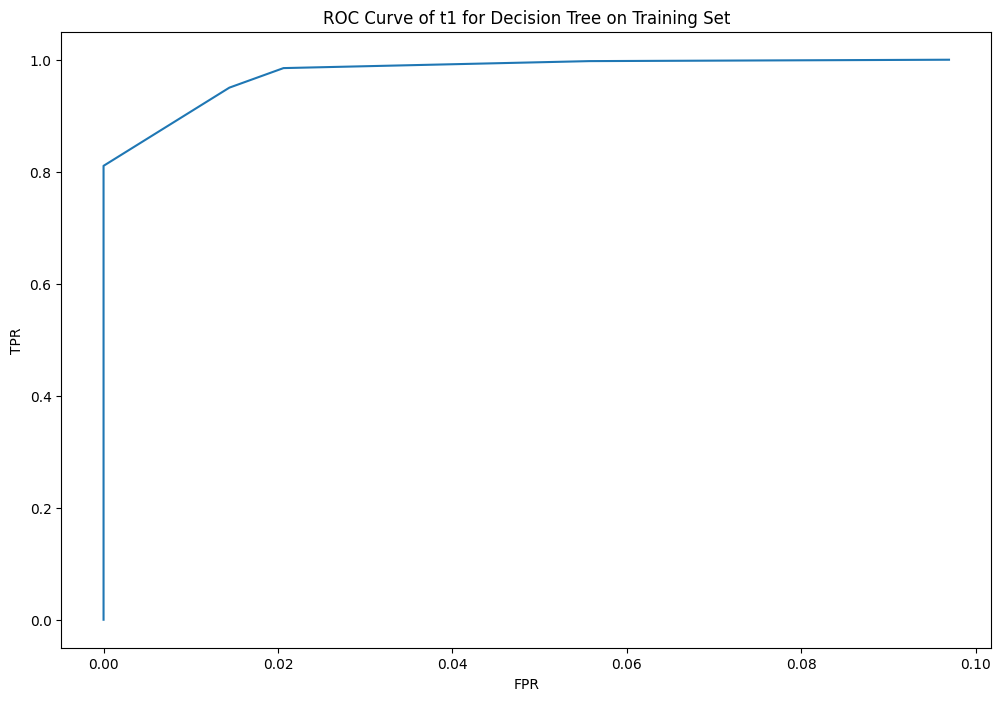

In [203]:
draw_roc_curve(result, 'ROC Curve of t1 for Decision Tree on Training Set')

In [204]:
# test t 
Y_test_probs = estimator.predict_proba(X_test)
Y_test_2_class_label = np.copy(Y_test)
Y_test_2_class_label[Y_test_2_class_label==2] = 1
print(Y_test_2_class_label.shape)
np.unique(Y_test_2_class_label)

(178,)


array([0, 1])

T1
[[11  2]
 [ 0 10]]
T1
[[12  1]
 [ 0 10]]
T1
[[10  2]
 [ 1  9]]
T1
[[11  1]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[11  1]
 [ 0 10]]
T1
[[13  0]
 [ 1  9]]
T1
[[11  2]
 [ 0 10]]
T1
[[10  2]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[11  1]
 [ 0 10]]
T1
[[11  1]
 [ 0 10]]
T1
[[11  1]
 [ 0 10]]
T1
[[13  0]
 [ 0 10]]
T1
[[12  1]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[10  2]
 [ 0 10]]
T1
[[ 9  3]
 [ 0 10]]
T1
[[12  0]
 [ 1  9]]
T1
[[11  1]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[12  1]
 [ 0 10]]
T1
[[12  1]
 [ 0 10]]
T1
[[11  1]
 [ 1  9]]
T1
[[11  1]
 [ 0 10]]
T1
[[11  1]
 [ 0 10]]
T1
[[10  2]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[11  2]
 [ 0 10]]
T1
[[13  0]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[9 3]
 [1 9]]
T1
[[10  2]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[11  2]
 [ 0 10]]
T1
[[12  1]
 [ 0 10]]
T1
[[10  2]
 [ 1  9]]
T1
[[11  1]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[12  0]
 [

[[ 9  3]
 [ 0 10]]
T1
[[12  0]
 [ 1  9]]
T1
[[11  1]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[12  1]
 [ 0 10]]
T1
[[12  1]
 [ 0 10]]
T1
[[11  1]
 [ 1  9]]
T1
[[11  1]
 [ 0 10]]
T1
[[11  1]
 [ 0 10]]
T1
[[10  2]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[11  2]
 [ 0 10]]
T1
[[13  0]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[9 3]
 [1 9]]
T1
[[10  2]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[11  2]
 [ 0 10]]
T1
[[12  1]
 [ 0 10]]
T1
[[10  2]
 [ 1  9]]
T1
[[11  1]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[11  1]
 [ 0 10]]
T1
[[13  0]
 [ 1  9]]
T1
[[11  2]
 [ 0 10]]
T1
[[10  2]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[11  1]
 [ 0 10]]
T1
[[11  1]
 [ 0 10]]
T1
[[11  1]
 [ 0 10]]
T1
[[13  0]
 [ 0 10]]
T1
[[12  1]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[10  2]
 [ 0 10]]
T1
[[ 9  3]
 [ 0 10]]
T1
[[12  0]
 [ 1  9]]
T1
[[11  1]
 [ 0 10]]
T1
[[12  0]
 [ 0 10]]
T1
[[12  1]
 [ 0 10]]
T1
[[12  1]
 [ 0 

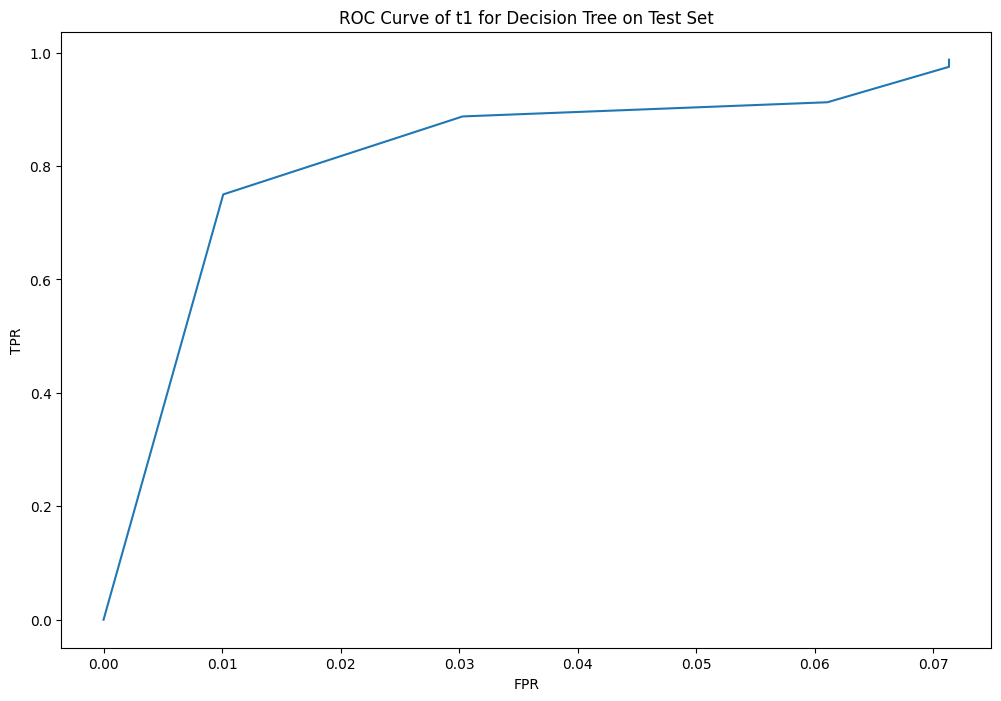

T1
[[91  7]
 [ 2 78]]
TPR:  0.975
TNR:  0.9285714285714286
accu:  0.949438202247191
CM
[[91  7]
 [ 2 78]]


In [205]:
t = 0.49
test_t(t, Y_test_2_class_label, Y_test_probs, 'ROC Curve of t1 for Decision Tree on Test Set')

Find t2

In [206]:
Y_train_2_class = np.copy(Y_train)
Y_train_2_class = Y_train_2_class[~(Y_train==0)]
Y_train_2_prob = Y_train_prob[~(Y_train==0)]
print(Y_train_2_prob.shape)

(401, 3)


In [207]:
result = thresholding_with_folds(Y_train_2_class, Y_train_2_prob, get_t1=False)

T2
[[ 1 17]
 [ 0 33]]
T2
[[ 2 16]
 [ 0 33]]
T2
[[ 0 18]
 [ 0 33]]
T2
[[ 2 16]
 [ 0 32]]
T2
[[ 4 14]
 [ 0 32]]
T2
[[ 0 18]
 [ 0 32]]
T2
[[ 0 17]
 [ 0 32]]
T2
[[ 0 17]
 [ 0 32]]
T2
[[ 2 16]
 [ 0 33]]
T2
[[ 0 18]
 [ 0 33]]
T2
[[ 0 18]
 [ 0 33]]
T2
[[ 2 16]
 [ 0 32]]
T2
[[ 1 17]
 [ 0 32]]
T2
[[ 0 18]
 [ 0 32]]
T2
[[ 2 15]
 [ 0 32]]
T2
[[ 2 15]
 [ 0 32]]
T2
[[ 2 16]
 [ 0 33]]
T2
[[ 0 18]
 [ 0 33]]
T2
[[ 0 18]
 [ 0 33]]
T2
[[ 2 16]
 [ 0 32]]
T2
[[ 1 17]
 [ 0 32]]
T2
[[ 1 17]
 [ 0 32]]
T2
[[ 1 16]
 [ 0 32]]
T2
[[ 2 15]
 [ 0 32]]
T2
[[ 2 16]
 [ 0 33]]
T2
[[ 2 16]
 [ 0 33]]
T2
[[ 0 18]
 [ 0 33]]
T2
[[ 0 18]
 [ 0 32]]
T2
[[ 2 16]
 [ 0 32]]
T2
[[ 0 18]
 [ 0 32]]
T2
[[ 2 15]
 [ 0 32]]
T2
[[ 1 16]
 [ 0 32]]
T2
[[ 1 17]
 [ 0 33]]
T2
[[ 0 18]
 [ 0 33]]
T2
[[ 2 16]
 [ 0 33]]
T2
[[ 2 16]
 [ 0 32]]
T2
[[ 2 16]
 [ 0 32]]
T2
[[ 0 18]
 [ 0 32]]
T2
[[ 2 15]
 [ 0 32]]
T2
[[ 0 17]
 [ 0 32]]
T2
[[ 1 17]
 [ 0 33]]
T2
[[ 2 16]
 [ 0 33]]
T2
[[ 0 18]
 [ 0 33]]
T2
[[ 2 16]
 [ 0 32]]
T2
[[ 4 14]
 [ 0 32]]
T2
[[ 0 18

[[ 2 16]
 [ 0 33]]
T2
[[ 0 18]
 [ 0 33]]
T2
[[ 2 16]
 [ 0 32]]
T2
[[ 4 14]
 [ 0 32]]
T2
[[ 0 18]
 [ 0 32]]
T2
[[ 0 17]
 [ 0 32]]
T2
[[ 0 17]
 [ 0 32]]
T2
[[ 2 16]
 [ 0 33]]
T2
[[ 0 18]
 [ 0 33]]
T2
[[ 0 18]
 [ 0 33]]
T2
[[ 2 16]
 [ 0 32]]
T2
[[ 1 17]
 [ 0 32]]
T2
[[ 0 18]
 [ 0 32]]
T2
[[ 2 15]
 [ 0 32]]
T2
[[ 2 15]
 [ 0 32]]
T2
[[ 2 16]
 [ 0 33]]
T2
[[ 0 18]
 [ 0 33]]
T2
[[ 0 18]
 [ 0 33]]
T2
[[ 2 16]
 [ 0 32]]
T2
[[ 1 17]
 [ 0 32]]
T2
[[ 1 17]
 [ 0 32]]
T2
[[ 1 16]
 [ 0 32]]
T2
[[ 2 15]
 [ 0 32]]
T2
[[ 2 16]
 [ 0 33]]
T2
[[ 2 16]
 [ 0 33]]
T2
[[ 0 18]
 [ 0 33]]
T2
[[ 0 18]
 [ 0 32]]
T2
[[ 2 16]
 [ 0 32]]
T2
[[ 0 18]
 [ 0 32]]
T2
[[ 2 15]
 [ 0 32]]
T2
[[ 1 16]
 [ 0 32]]
T2
[[ 1 17]
 [ 0 33]]
T2
[[ 0 18]
 [ 0 33]]
T2
[[ 2 16]
 [ 0 33]]
T2
[[ 2 16]
 [ 0 32]]
T2
[[ 2 16]
 [ 0 32]]
T2
[[ 0 18]
 [ 0 32]]
T2
[[ 2 15]
 [ 0 32]]
T2
[[ 0 17]
 [ 0 32]]
T2
[[ 1 17]
 [ 0 33]]
T2
[[ 2 16]
 [ 0 33]]
T2
[[ 0 18]
 [ 0 33]]
T2
[[ 2 16]
 [ 0 32]]
T2
[[ 4 14]
 [ 0 32]]
T2
[[ 0 18]
 [ 0 32]]
T2
[[ 0 17]
 

In [208]:
result

[[0.0,
  1.0,
  0.0,
  0.06348039215686277,
  0.056545805083456066,
  0.6683975590236095,
  0.020511141767248525],
 [0.005,
  1.0,
  0.0,
  0.06348039215686277,
  0.056545805083456066,
  0.6683975590236095,
  0.020511141767248525],
 [0.01,
  1.0,
  0.0,
  0.06348039215686277,
  0.056545805083456066,
  0.6683975590236095,
  0.020511141767248525],
 [0.015,
  1.0,
  0.0,
  0.06348039215686277,
  0.056545805083456066,
  0.6683975590236095,
  0.020511141767248525],
 [0.02,
  1.0,
  0.0,
  0.06348039215686277,
  0.056545805083456066,
  0.6683975590236095,
  0.020511141767248525],
 [0.025,
  1.0,
  0.0,
  0.06348039215686277,
  0.056545805083456066,
  0.6683975590236095,
  0.020511141767248525],
 [0.03,
  1.0,
  0.0,
  0.06348039215686277,
  0.056545805083456066,
  0.6683975590236095,
  0.020511141767248525],
 [0.035,
  1.0,
  0.0,
  0.06348039215686277,
  0.056545805083456066,
  0.6683975590236095,
  0.020511141767248525],
 [0.04,
  1.0,
  0.0,
  0.06348039215686277,
  0.056545805083456066,


0.0 	 1.0 	 0.9365196078431373 	 0.6683975590236095
0.005 	 1.0 	 0.9365196078431373 	 0.6683975590236095
0.01 	 1.0 	 0.9365196078431373 	 0.6683975590236095
0.015 	 1.0 	 0.9365196078431373 	 0.6683975590236095
0.02 	 1.0 	 0.9365196078431373 	 0.6683975590236095
0.025 	 1.0 	 0.9365196078431373 	 0.6683975590236095
0.03 	 1.0 	 0.9365196078431373 	 0.6683975590236095
0.035 	 1.0 	 0.9365196078431373 	 0.6683975590236095
0.04 	 1.0 	 0.9365196078431373 	 0.6683975590236095
0.045 	 1.0 	 0.9365196078431373 	 0.6683975590236095
0.05 	 1.0 	 0.9365196078431373 	 0.6683975590236095
0.055 	 1.0 	 0.9365196078431373 	 0.6683975590236095
0.06 	 0.9730350378787879 	 0.5 	 0.8056298519407763
0.065 	 0.9730350378787879 	 0.5 	 0.8056298519407763
0.07 	 0.9730350378787879 	 0.5 	 0.8056298519407763
0.075 	 0.9730350378787879 	 0.5 	 0.8056298519407763
0.08 	 0.9730350378787879 	 0.5 	 0.8056298519407763
0.085 	 0.9576467803030303 	 0.3242647058823529 	 0.8578735494197678
0.09 	 0.95764678030303

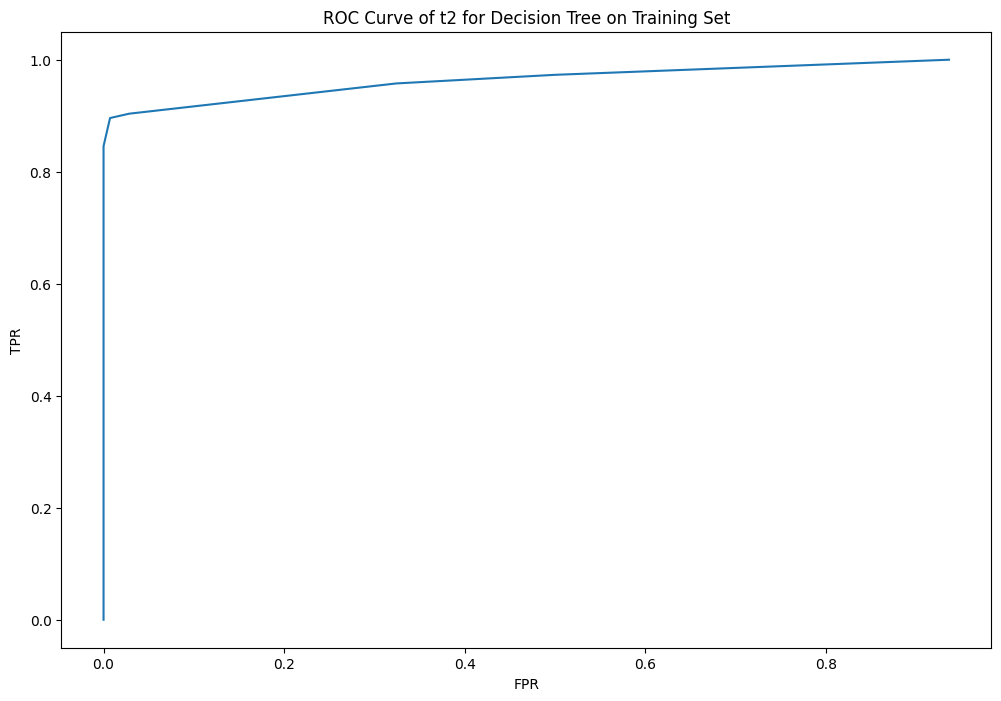

In [209]:
draw_roc_curve(result, 'ROC Curve of t2 for Decision Tree on Training Set')

Test t2

In [210]:
Y_test_2_class_label = np.copy(Y_test)
Y_test_2_class_label[Y_test_2_class_label==2] = 1

In [211]:
t1 = 0.490
label_t1 = ((Y_test_probs[:,1]+Y_test_probs[:,2])> t1).astype(int)
#label_t1 = ((Y_test_probs[:,0]/(Y_test_probs[:,1]+Y_test_probs[:,2] + 0.001))<t1).astype(int)
confusion_matrix(Y_test_2_class_label, label_t1)


array([[91,  7],
       [ 2, 78]])

In [212]:
Y_test_probs_pass_t1 = Y_test_probs[(label_t1 == 1) & ~(Y_test == 0)]
Y_test_pass_t1 = Y_test[(label_t1 == 1) & ~(Y_test == 0)]
print(Y_test_pass_t1.shape)

(78,)


T2
[[1 3]
 [0 7]]
T2
[[1 3]
 [1 6]]
T2
[[1 2]
 [0 7]]
T2
[[0 3]
 [0 7]]
T2
[[0 3]
 [0 6]]
T2
[[1 2]
 [0 6]]
T2
[[0 3]
 [0 6]]
T2
[[1 2]
 [0 6]]
T2
[[0 4]
 [0 7]]
T2
[[1 3]
 [0 7]]
T2
[[1 2]
 [0 7]]
T2
[[0 3]
 [1 6]]
T2
[[1 2]
 [0 6]]
T2
[[1 2]
 [0 6]]
T2
[[1 2]
 [0 6]]
T2
[[0 3]
 [0 6]]
T2
[[1 3]
 [0 7]]
T2
[[2 2]
 [0 7]]
T2
[[0 3]
 [0 7]]
T2
[[0 3]
 [0 7]]
T2
[[1 2]
 [0 6]]
T2
[[1 2]
 [0 6]]
T2
[[0 3]
 [1 5]]
T2
[[0 3]
 [0 6]]
T2
[[0 4]
 [0 7]]
T2
[[0 4]
 [0 7]]
T2
[[0 3]
 [0 7]]
T2
[[0 3]
 [1 6]]
T2
[[2 1]
 [0 6]]
T2
[[1 2]
 [0 6]]
T2
[[1 2]
 [0 6]]
T2
[[1 2]
 [0 6]]
T2
[[0 4]
 [1 6]]
T2
[[1 3]
 [0 7]]
T2
[[0 3]
 [0 7]]
T2
[[2 1]
 [0 7]]
T2
[[0 3]
 [0 6]]
T2
[[2 1]
 [0 6]]
T2
[[0 3]
 [0 6]]
T2
[[0 3]
 [0 6]]
T2
[[1 3]
 [0 7]]
T2
[[1 3]
 [1 6]]
T2
[[1 2]
 [0 7]]
T2
[[0 3]
 [0 7]]
T2
[[0 3]
 [0 6]]
T2
[[1 2]
 [0 6]]
T2
[[0 3]
 [0 6]]
T2
[[1 2]
 [0 6]]
T2
[[0 4]
 [0 7]]
T2
[[1 3]
 [0 7]]
T2
[[1 2]
 [0 7]]
T2
[[0 3]
 [1 6]]
T2
[[1 2]
 [0 6]]
T2
[[1 2]
 [0 6]]
T2
[[1 2]
 [0 6]]
T2
[[0 3]


T2
[[0 3]
 [0 6]]
T2
[[0 4]
 [0 7]]
T2
[[0 4]
 [0 7]]
T2
[[0 3]
 [0 7]]
T2
[[0 3]
 [1 6]]
T2
[[2 1]
 [0 6]]
T2
[[1 2]
 [0 6]]
T2
[[1 2]
 [0 6]]
T2
[[1 2]
 [0 6]]
T2
[[0 4]
 [1 6]]
T2
[[1 3]
 [0 7]]
T2
[[0 3]
 [0 7]]
T2
[[2 1]
 [0 7]]
T2
[[0 3]
 [0 6]]
T2
[[2 1]
 [0 6]]
T2
[[0 3]
 [0 6]]
T2
[[0 3]
 [0 6]]
T2
[[1 3]
 [0 7]]
T2
[[1 3]
 [1 6]]
T2
[[1 2]
 [0 7]]
T2
[[0 3]
 [0 7]]
T2
[[0 3]
 [0 6]]
T2
[[1 2]
 [0 6]]
T2
[[0 3]
 [0 6]]
T2
[[1 2]
 [0 6]]
T2
[[0 4]
 [0 7]]
T2
[[1 3]
 [0 7]]
T2
[[1 2]
 [0 7]]
T2
[[0 3]
 [1 6]]
T2
[[1 2]
 [0 6]]
T2
[[1 2]
 [0 6]]
T2
[[1 2]
 [0 6]]
T2
[[0 3]
 [0 6]]
T2
[[1 3]
 [0 7]]
T2
[[2 2]
 [0 7]]
T2
[[0 3]
 [0 7]]
T2
[[0 3]
 [0 7]]
T2
[[1 2]
 [0 6]]
T2
[[1 2]
 [0 6]]
T2
[[0 3]
 [1 5]]
T2
[[0 3]
 [0 6]]
T2
[[0 4]
 [0 7]]
T2
[[0 4]
 [0 7]]
T2
[[0 3]
 [0 7]]
T2
[[0 3]
 [1 6]]
T2
[[2 1]
 [0 6]]
T2
[[1 2]
 [0 6]]
T2
[[1 2]
 [0 6]]
T2
[[1 2]
 [0 6]]
T2
[[0 4]
 [1 6]]
T2
[[1 3]
 [0 7]]
T2
[[0 3]
 [0 7]]
T2
[[2 1]
 [0 7]]
T2
[[0 3]
 [0 6]]
T2
[[2 1]
 [0 6]]
T2
[[0 3]


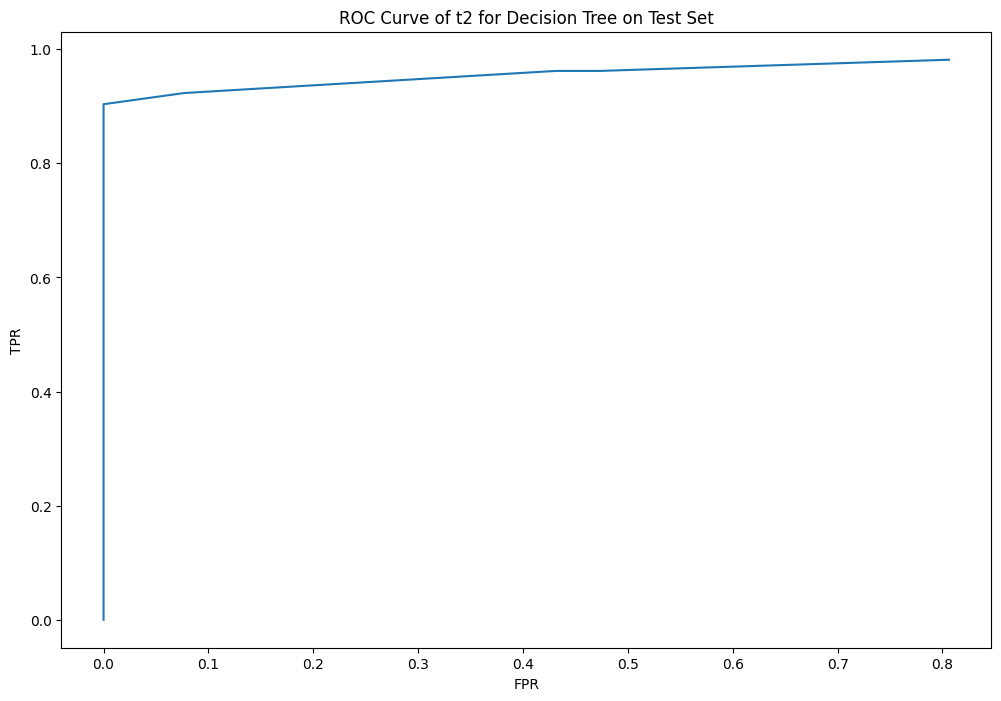

T2
[[26  0]
 [ 5 47]]
TPR:  0.9038461538461539
TNR:  1.0
accu:  0.9358974358974359
CM
[[26  0]
 [ 5 47]]


In [213]:
t2 = 0.295
#ypred_t2 = ((Y_test_probs_pass_t1[:,1]/(Y_test_probs_pass_t1[:,2] + 0.001)<t2) + 1).astype(int)
test_t(t2, Y_test_pass_t1, Y_test_probs_pass_t1, 'ROC Curve of t2 for Decision Tree on Test Set', get_t1=False)

**Train and test using all feature**

In [214]:
X_train = data_train.values
X_test = data_test.values
print(f'X train: {X_train.shape}')
print(f'Y train: {len(Y_train)}')
print(f'X test: {X_test.shape}')
print(f'Y test: {len(Y_test)}')

X train: (886, 21)
Y train: 886
X test: (178, 21)
Y test: 178


In [215]:
params = {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 70}
gbt = GradientBoostingClassifier(**params)
gbt= gbt.fit(X_train, Y_train)
feature_weight_pair = sorted(zip(data_train.columns.values, gbt.feature_importances_), key=lambda pair : pair[1], reverse=True)
print('learnt importance:')
feature_weight_pair

learnt importance:


[('3class_label', 1.0),
 ('Mobility', 0.0),
 ('ArmSwelling', 0.0),
 ('BreastSwelling', 0.0),
 ('Skin', 0.0),
 ('PAS', 0.0),
 ('FHT', 0.0),
 ('DISCOMFORT', 0.0),
 ('SYM_COUNT', 0.0),
 ('ChestWallSwelling', 0.0),
 ('Chemotherapy', 0.0),
 ('Radiation', 0.0),
 ('Age', 0.0),
 ('SLNB_Removed_LN', 0.0),
 ('ALND_Removed_LN', 0.0),
 ('SLNB_ALND_Removed', 0.0),
 ('Mastectomy', 0.0),
 ('Lumpectomy', 0.0),
 ('Hormonal', 0.0),
 ('BMI', 0.0),
 ('TIME_LAPSE_LOG', 0.0)]

In [216]:
accu = gbt.score(X_test, Y_test, sample_weight=[w[i] for i in Y_test])
print(f'accuracy: {accu}')
CM = confusion_matrix(Y_test, gbt.predict(X_test))
print('confusion matrix:')
print(CM)

accuracy: 1.0
confusion matrix:
[[98  0  0]
 [ 0 28  0]
 [ 0  0 52]]


Check if there are sample overlap between the train and validation:

In [217]:
dataTest = pd.read_csv(test_set_dir)
dataTrain = pd.read_csv(DATA_PATH)

NameError: name 'test_set_dir' is not defined

In [ ]:
s1 = pd.merge(dataTest, dataTrain, how='inner', on=['Username'])

In [ ]:
s1

In [ ]:
# print(sorted(dataTest['Username'].values))

In [ ]:
# print(sorted(dataTrain['Username'].values))

Check label distribution

In [ ]:
{label:count for label, count in zip(*np.unique(Y_test, return_counts=True))}

In [ ]:
{label:count for label, count in zip(*np.unique(Y_train, return_counts=True))}

In [ ]:
a = np.array([583, 171, 311])

In [ ]:
w = a / np.sum(a)

In [ ]:
w = w[0] / w

In [ ]:
w / np.sum(w)

In [ ]:
paris = [("Arm Swelling", 0.456441),
("Symptom Count", 0.421406),
("BreastSwelling", 0.073692),
("TIME LAPSE", 0.037715), 
("Age", 0.006301),
("FHT", 0.002236),
("Fibrosis", 0.001830),
("Mobility", 0.000378)]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
feat_names, feat_scores = list(zip(*paris[::-1]))

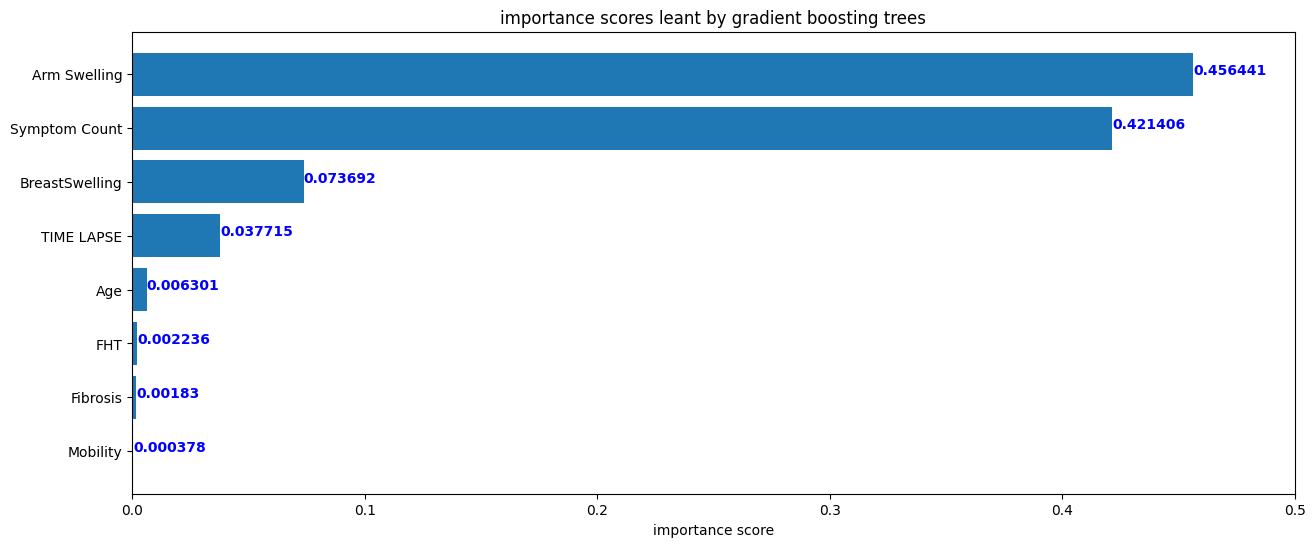

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax.barh(feat_names, feat_scores, align='center')
ax.set_xlabel('importance score')
ax.set_title('importance scores leant by gradient boosting trees')
ax.set_xlim([0, 0.5])
for i, v in enumerate(feat_scores):
    ax.text(v, i, str(v), color='blue', fontweight='bold')